In [1]:
import yfinance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
import yfinance as yf
from datetime import date, timedelta

In [4]:
today = date.today()
today

datetime.date(2023, 8, 29)

In [5]:
end_date = today.strftime("%Y-%m-%d")
end_date

'2023-08-29'

In [6]:
d1 = date.today() - timedelta(days=360*5) #for last 5 years
d1

datetime.date(2018, 9, 24)

In [7]:
start_date = d1.strftime("%Y-%m-%d")
start_date

'2018-09-24'

In [8]:
#Call API
data = yf.download(tickers = "GOOGL",
                  start = start_date,
                  end = end_date)
data.shape

[*********************100%%**********************]  1 of 1 completed


(1240, 6)

In [9]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-24,57.970501,59.259499,57.575001,58.978001,58.978001,31150000
2018-09-25,59.212502,59.842999,58.704498,59.694500,59.694500,33152000
2018-09-26,59.684502,60.362000,59.270000,59.702999,59.702999,37650000
2018-09-27,60.000000,60.842999,59.902500,60.368000,60.368000,36274000
2018-09-28,60.204498,60.422501,59.891499,60.354000,60.354000,35612000


In [10]:
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-24,57.970501,59.259499,57.575001,58.978001,58.978001,31150000
1,2018-09-25,59.212502,59.842999,58.704498,59.694500,59.694500,33152000
2,2018-09-26,59.684502,60.362000,59.270000,59.702999,59.702999,37650000
3,2018-09-27,60.000000,60.842999,59.902500,60.368000,60.368000,36274000
4,2018-09-28,60.204498,60.422501,59.891499,60.354000,60.354000,35612000
...,...,...,...,...,...,...,...
1235,2023-08-22,128.509995,130.279999,128.320007,129.080002,129.080002,22067500
1236,2023-08-23,130.179993,133.410004,129.869995,132.369995,132.369995,27819700
1237,2023-08-24,133.949997,134.250000,129.570007,129.779999,129.779999,28500700
1238,2023-08-25,129.539993,130.759995,127.250000,129.880005,129.880005,26744800


<Axes: xlabel='Date', ylabel='High'>

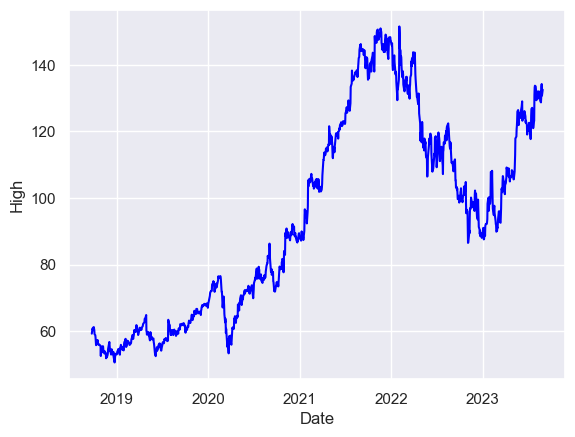

In [11]:
sns.lineplot(data=data,
            x='Date',
            y='High',
            color='blue')

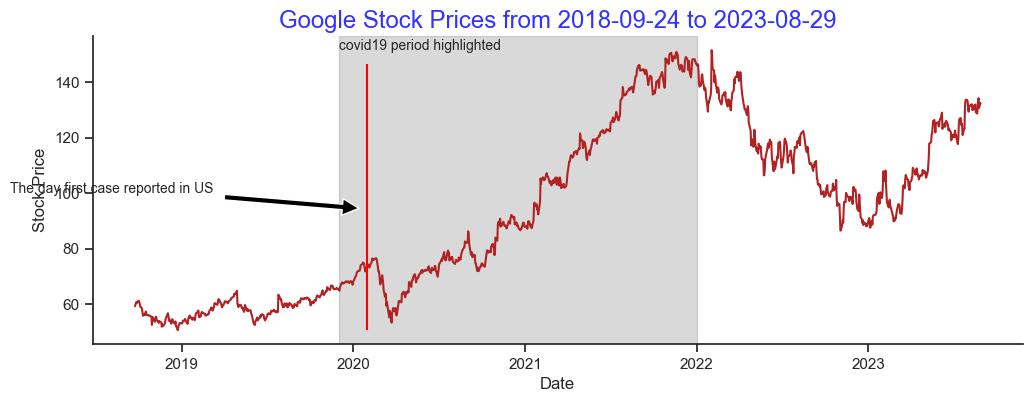

In [12]:
plt.figure(figsize=(12,4))
sns.set_style('ticks')
sns.lineplot(data=data,
            x='Date',
            y='High',
            color='firebrick')

## First covid reported on December'19 in Wuhan
plt.axvspan(xmin=pd.to_datetime('2019-12-1'),
           xmax= pd.to_datetime('2022'),
           color="dimgray",
           alpha=0.25)
plt.text(x=pd.to_datetime('2019-12-1'),
        y=data["High"].max(),
        size='small',
        s= "covid19 period highlighted")

##First covid case in US on 30 Jan'20
plt.vlines(x=pd.to_datetime('2020-01-30'),
          color='red',
          ymin=data['High'].min(),
          ymax=data['High'].max()-5)
plt.annotate(text='The day first case reported in US',
            xy=(pd.to_datetime('2020-1-30'),
               data['High'].mean()),
            xytext=(pd.to_datetime('2018-1-1'),100),
            size='small',
            arrowprops=dict(facecolor='black',shrink=0.05))
plt.title("Google Stock Prices from {0} to {1}".format(start_date,end_date),
         c='blue',
         alpha=0.8,
         size='x-large');
sns.despine()
plt.ylabel("Stock Price");


In [15]:
import mplfinance

In [16]:
#to plot candlestick chart
new_data = data.set_index(keys='Date')
new_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-24,57.970501,59.259499,57.575001,58.978001,58.978001,31150000
2018-09-25,59.212502,59.842999,58.704498,59.694500,59.694500,33152000
2018-09-26,59.684502,60.362000,59.270000,59.702999,59.702999,37650000
2018-09-27,60.000000,60.842999,59.902500,60.368000,60.368000,36274000
2018-09-28,60.204498,60.422501,59.891499,60.354000,60.354000,35612000
...,...,...,...,...,...,...
2023-08-22,128.509995,130.279999,128.320007,129.080002,129.080002,22067500
2023-08-23,130.179993,133.410004,129.869995,132.369995,132.369995,27819700
2023-08-24,133.949997,134.250000,129.570007,129.779999,129.779999,28500700


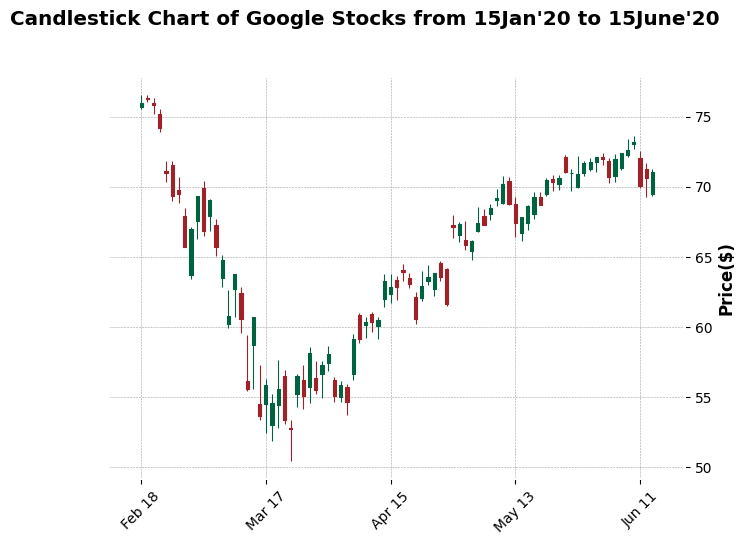

In [17]:
mplfinance.plot(new_data.loc[pd.to_datetime('2020-2-15'):pd.to_datetime('2020-6-15'), :],
               type='candle',
               style='charles',
               title="Candlestick Chart of Google Stocks from 15Jan'20 to 15June'20",
               ylabel='Price($)')

In [18]:
print("Timezone-naive datetime object/timestamp: ",end="")
pd.to_datetime("2020-1-1")

Timezone-naive datetime object/timestamp: 

Timestamp('2020-01-01 00:00:00')

In [19]:
print("/Timezone-aware datetime object/timestamp: ",end="")
pd.to_datetime("2020-1-1").tz_localize(tz='Asia/Kolkata')

/Timezone-aware datetime object/timestamp: 

Timestamp('2020-01-01 00:00:00+0530', tz='Asia/Kolkata')

In [22]:

mplfinance.plot(new_data.loc[pd.to_datetime("2020-2-15").tz_localize(tz='Asia/Kolkata'):
                            pd.to_datetime("2020-6-15").tz_localize(tz='Asia/Kolkata'), :],
               type='candle',
               style='charles',
               title="Candlestick Chart of Google Stocks from 15Jan'20 to 15June'20",
               ylabel='Price($)')


NameError: name 'tz_convert' is not defined